# Bank dataset

We have a transaction details of 515 banks which include number of DD taken, Withdrawals, Deposits, Area of the branch and Average Walk-Ins. Profile the banks into segments and come up with recommendations for each segment.

# Import libraries and load data

In [64]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
data_df = pd.read_csv("leaf_data_uci_updated.csv")

# Checking the data

In [66]:
data_df.head()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214


In [67]:
data_df.shape

(340, 14)

In [68]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Eccentricity               340 non-null    float64
 1   Aspect Ratio               340 non-null    float64
 2   Elongation                 340 non-null    float64
 3   Solidity                   340 non-null    float64
 4   Stochastic Convexity       340 non-null    float64
 5   Isoperimetric Factor       340 non-null    float64
 6   Maximal Indentation Depth  340 non-null    float64
 7   Lobedness                  340 non-null    float64
 8   Average Intensity          340 non-null    float64
 9    Average Contrast          340 non-null    float64
 10  Smoothness                 340 non-null    float64
 11   Third moment              340 non-null    float64
 12  Uniformity                 340 non-null    float64
 13  Entropy                    340 non-null    float64

# Checking Summary Statistic

In [69]:
data_df.describe()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,0.719854,1.902051,0.513760,0.919101,0.975867,0.531234,0.034647,0.284499,0.051209,0.124535,0.017491,0.005678,0.000356,1.162630
std,0.208311,0.888783,0.195583,0.075247,0.032506,0.217532,0.031502,0.365318,0.035518,0.051860,0.013189,0.004495,0.000336,0.584854
min,0.117080,1.006600,0.107610,0.761323,0.915575,0.078376,0.002837,0.001464,0.005022,0.033415,0.001115,0.000229,0.000007,0.169400
25%,0.550622,1.211300,0.349623,0.890667,0.966230,0.346818,0.009521,0.016500,0.022843,0.083362,0.006901,0.002080,0.000102,0.718900
50%,0.763450,1.570750,0.501855,0.948130,0.992980,0.579160,0.023860,0.103615,0.042087,0.119375,0.014050,0.004447,0.000239,1.077450
75%,0.895097,2.343100,0.633373,0.976897,1.000000,0.700712,0.047834,0.416433,0.073046,0.163795,0.026127,0.008307,0.000516,1.554575
max,0.998710,4.040800,0.948340,0.993880,1.000000,0.858160,0.105303,1.016331,0.148349,0.280810,0.054967,0.017648,0.001137,2.708500


# Checking for Duplicates

In [70]:
data_df.duplicated().sum()

0

There are no Duplicates in the dataset

# Scaling the data

In [71]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [72]:
# Creating an object for the StandardScaler function
X = StandardScaler()

In [73]:
scaled_df = pd.DataFrame(X.fit_transform(data_df),columns=data_df.columns)

In [74]:
scaled_df

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,0.034066,-0.482099,-0.971865,0.881718,0.743486,1.402718,-0.953401,-0.769100,-0.096417,0.065951,-0.105019,-0.099339,-0.241076,0.022209
1,0.105170,-0.424069,-0.781384,0.830744,0.689571,1.231226,-0.934782,-0.766208,-0.762703,-0.657718,-0.711617,-0.661808,-0.836779,-0.798023
2,0.227715,-0.371335,-0.633812,0.777907,0.743486,1.274732,-0.864365,-0.752173,-1.108478,-1.295588,-1.078407,-1.060062,-0.946702,-1.231436
3,0.087093,-0.498437,-0.819275,0.752752,0.743486,1.315476,-0.882820,-0.756324,-0.994197,-1.140210,-1.003871,-1.007984,-0.862100,-0.984224
4,0.495931,-0.148005,-0.354030,0.770320,0.743486,1.029856,-0.865297,-0.752390,-1.220111,-1.529370,-1.172391,-1.140460,-0.989599,-1.404965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,-1.656859,-0.856758,1.554005,-2.099910,-1.857519,-1.869163,1.818855,2.006228,1.795295,1.623596,1.838507,1.708123,1.384125,1.481987
336,-2.111561,-0.920759,1.225989,-2.099910,-1.857519,-1.815621,1.409899,2.006228,2.537994,1.810722,2.125916,1.409096,2.327487,2.128913
337,-1.761569,-0.979353,1.370795,-2.099910,-1.857519,-1.824046,1.752190,2.006228,1.309833,1.593085,1.792795,2.327344,0.289506,0.909035
338,-0.576786,-0.855631,1.032077,-2.099910,-1.857519,-1.720736,2.246205,2.006228,-0.023134,0.218510,0.047836,0.114057,-0.271551,-0.017175


# Creating Clusters using KMeans

### Forming 2 Clusters with K=2

In [75]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2,random_state=1)

In [76]:
# Fit K means on the scaled_df
k_means.fit(scaled_df)

KMeans(n_clusters=2, random_state=1)

### Cluster Output for all the observations

In [77]:
# Get the labels
k_means.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Within Cluster Sum of Squares

In [78]:
k_means.inertia_

3412.257118426089

### Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [79]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

4759.999999999998

In [80]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

2389.2847622446275

In [81]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

1895.5346689676153

In [82]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

1672.488493930572

In [83]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

1444.588242104043

WSS reduces as K keeps increasing

In [84]:
k_means = KMeans(n_clusters = 4,random_state=0)
k_means.fit(scaled_df)
k_means.inertia_

1895.2525135696264

### Calculating WSS for other values of K - Elbow Method

In [39]:
wss =[] 

In [40]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [41]:
wss

[4759.999999999998,
 3412.257118426089,
 2389.2847622446275,
 1895.5346689676153,
 1672.488493930572,
 1444.588242104043,
 1257.5854552886256,
 1135.0669760285068,
 1033.4497551369154,
 955.7857112708227]

In [42]:
a=[1,2,3,4,5,6,7,8,9,10]

C:\Users\King\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

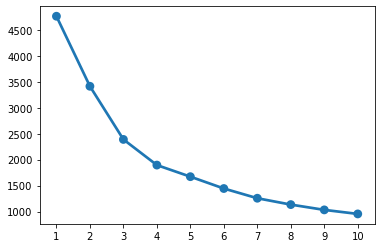

In [43]:
sns.pointplot(a, wss)

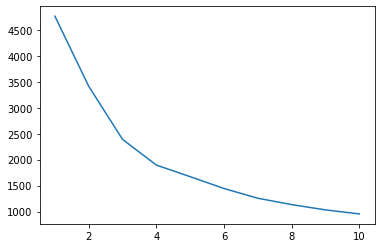

In [44]:
plt.plot(range(1,11), wss)

# KMeans with K=2

In [45]:
k_means = KMeans(n_clusters = 2,random_state=0)
k_means.fit(scaled_df)
labels = k_means.labels_

### Cluster evaluation for 2 clusters: the silhouette score

In [47]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [48]:
# Calculating silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.342615963664137

# KMeans with K=2

In [49]:
k_means = KMeans(n_clusters = 2,random_state=0)
k_means.fit(scaled_df)
labels = k_means.labels_

### Cluster evaluation for 4 clusters

In [50]:
#from sklearn.metrics import silhouette_samples, silhouette_score

In [51]:
silhouette_score(scaled_df,labels,random_state=1)

0.342615963664137

silhouette score is better for 4 clusters than for 3 clusters. So, final clusters will be 4

Appending Clusters to the original dataset

In [52]:
data_df["Clus_kmeans4"] = labels
data_df.head()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy,Clus_kmeans4
0,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560,0
1,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659,0
2,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348,0
3,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785,0
4,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214,0


# Cluster Profiling

In [53]:
data_df.Clus_kmeans4.value_counts().sort_index()

0    259
1     81
Name: Clus_kmeans4, dtype: int64

In [54]:
clust_profile=data_df
clust_profile=clust_profile.groupby('Clus_kmeans4').mean()
clust_profile['freq']=data_df.Clus_kmeans4.value_counts().sort_index()
clust_profile

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy,freq
Clus_kmeans4,,,,,,,,,,,,,,,
0,0.742849,1.924542,0.462009,0.955379,0.992359,0.620862,0.019937,0.108086,0.054176,0.128885,0.018551,0.005972,0.000392,1.202431,259
1,0.646327,1.830133,0.679237,0.803102,0.923135,0.244643,0.081680,0.848586,0.041724,0.110625,0.014103,0.004740,0.000239,1.035365,81


- Cluster 0: Medium size bank with less withdrawal,walkin, DD but highest Deposit
- Cluster 1: Medium size bank with less walkins and deposits and high withdrawals
- Cluster 2: Small size bank with less deposit but highest walkins and Withdrawals, and large DD
- Cluster 3: Large size bank with more number of walkins and highest DD, but less Deposits

# Some Recommendations

1. The banks in Cluster 3 has high DD and Withdrawals, but less Deposit.  So it needs to improve in making the customers Deposit more. Relatively large number of customers are visiting these banks. So, can promote various deposit schemes to these customers.


2. Customers in Cluster 3 seems to prefer payment through DD as these banks record the highest DD rate. Banks can check if DD is being made to other banks or to the same bank, and can look to create DD schemes for their own bank, so that customers will open their account with these banks and use the DD payment scheme.


3. Customers preferring DD payment can go to banks either in Cluster 3 (if they need large space which can manage large crowd probably with more infrastructure facilities), or Cluster 2 (if they want small space where probably quick transaction can happen due to less crowd holding capacity) 


4. Size of the bank doesn't matter in accomodating large group of customers inside the bank, as Cluster 2 though having the least Branch Area, has the highest daily walk ins. So, banks don't need to invest more in occupying large land space. This could mean Customers are visiting throughout the day rather than a large group of customers visiting during a period.


5. Cluster 0 has large area and the proportion of withdrawals and deposits is almost equal. Most of these customers could be having a savings account since the withdrawals as well as DD are less when compared to other clusters. Customers visiting these banks are also lesser than other clusters. These banks can look bringing in more customers and increase the bank deposit by introducing various deposit schemes.


6. Deposit is again less, while the withdrawals are much higher for Cluster 1. These banks can also look to introducing new deposit schemes.


7. Banks in cluster 1 and 2, needs to focus on their infrastructure and banking facilities, since the area is lesser than cluster 0 and 3 , whereas daily walkins is the highest. These banks can also look for opportunities to cross-sell products to the customers.


In [39]:
data_df.to_csv('km.csv')

In [55]:
np.random.seed(7)
array=np.array(np.random.rand(20)).reshape(10,2)
for n_clusters=2

SyntaxError: invalid syntax (<ipython-input-55-72dcbd59079b>, line 3)

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

X= np.random.seed(7)
Y= np.array(np.random.rand(20)).reshape(10,2)
Z= np.concatenate((X,Y))
Z=pd.DataFrame(Z) #converting into data frame for ease

ValueError: zero-dimensional arrays cannot be concatenated

In [63]:
from sklearn import datasets
from sklearn.cluster import KMeans
#
# Load IRIS dataset
#
iris = datasets.load_iris()
X = iris.data
y = iris.target
#
# Instantiate the KMeans models
#
km = KMeans(n_clusters=2, random_state=20)
#
# Fit the KMeans model
#
km.fit_predict(X)
#
# Calculate Silhoutte Score
#
score = silhouette_score(X, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.681
